In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
advertising = pd.DataFrame(pd.read_csv("/content/archive (1).zip"))
advertising.shape
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [8]:
import os
for dirname, _, filenames in os.walk('/content/archive (1).zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [10]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [14]:
advertising.isnull().sum()   #to find null values in dataset

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
advertising['Sales'].value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

In [17]:
#independent variable -'TV','radio ','newpaper'
# dependent variable -' Sale'

# indenpend and dependent variable both are  in numriacal catogory  and both are indenpendent
#type of linear regression
#simple linear regression -means one dependent and another is indepenedent and both are in numerical
#multiple linear regression -means one independent and another is indenpendent and both
#polinomail linear regression

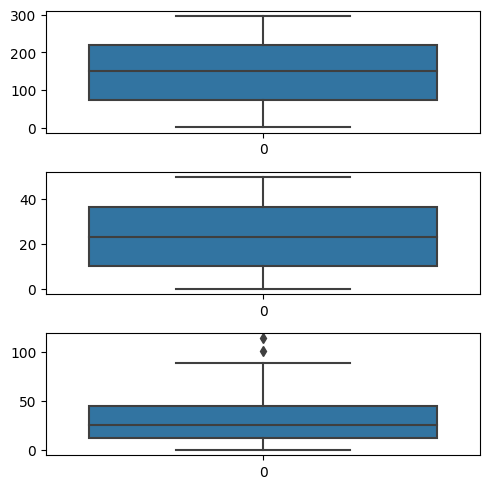

In [18]:
fig,axs=plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(advertising['TV'],ax=axs[0])
plt2=sns.boxplot(advertising['Radio'],ax=axs[1])
plt2=sns.boxplot(advertising['Newspaper'],ax=axs[2])
plt.tight_layout()

<Axes: >

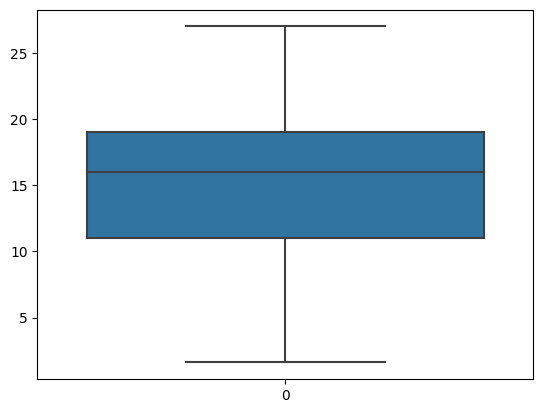

In [19]:
#EDA :
#univariate analysis
sns.boxplot(advertising['Sales'])

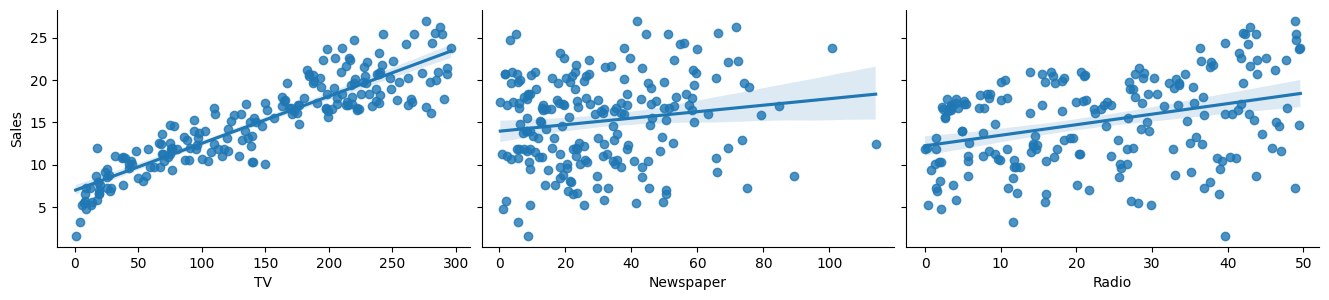

In [20]:
# need to check that how my sales are related with other variable
sns.pairplot(advertising,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=3,aspect=1.5,kind='reg')
plt.show()
#aspect=1 means the thikness of the data points
#kind='reg' means regression plot

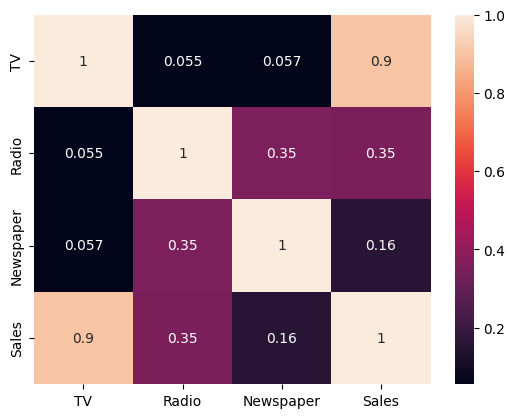

In [21]:
#heat map of advertising
sns.heatmap(advertising.corr(),annot=True)
plt.show()

In [23]:
X=advertising['TV'] # independent variable or features
y=advertising['Sales'] # dependent variable or features

from sklearn.model_selection import train_test_split
# we are calling the library to perform train and test split and then we start splitting the data

#         test       train
#   X    Xtest      Xtrain
#   y    ytest      ytrain

In [24]:
#y=mX+c

# to add the value to "c": Intercept

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
# a total of the 3 new variable are formed =train_test_split (X,y,train and test data random_state)
#we ca n take anu values in train and test data  and need to remider that the train data size must be
# more as compair to test data
#random state= [100,83,45 etc.] to do the randomazation of train and test data

In [25]:
import statsmodels.api as sm
#this library  i am using to fibricate the data model based on the SLR(simple regression model)
X_train_sm=sm.tools.tools.add_constant(X_train)
#add_constant - as per the snytax
#model will  always be mode on independent varible and by using its train data

In [26]:
#using the fit transform for OLS to fit the  line across L.R dist
lr=sm.OLS(y_train,X_train_sm).fit()

#OLS - Ordinary least Square.  The goal of OLS is to minimize the sum of the squared differences
#between the observed values of the dependent variable and the predicted values of the dependent variable
#based on the independent variables.

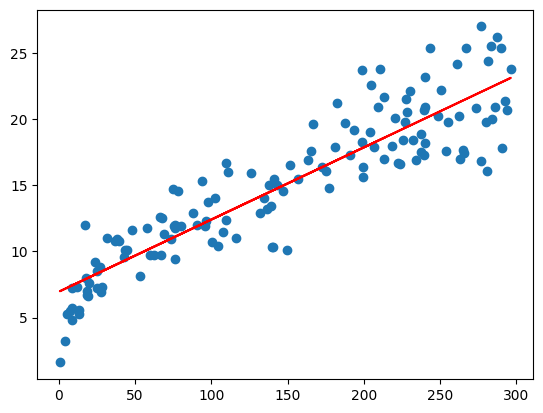

In [28]:
lr.params

#correlation -
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948683+0.054546*X_train,'r')
plt.show()

In [29]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        15:08:39   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

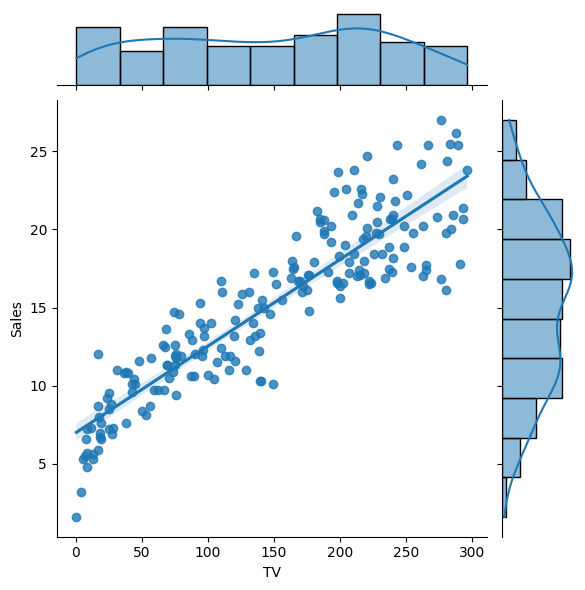

In [31]:
sns.jointplot(x='TV',y='Sales',data=advertising,kind='reg');


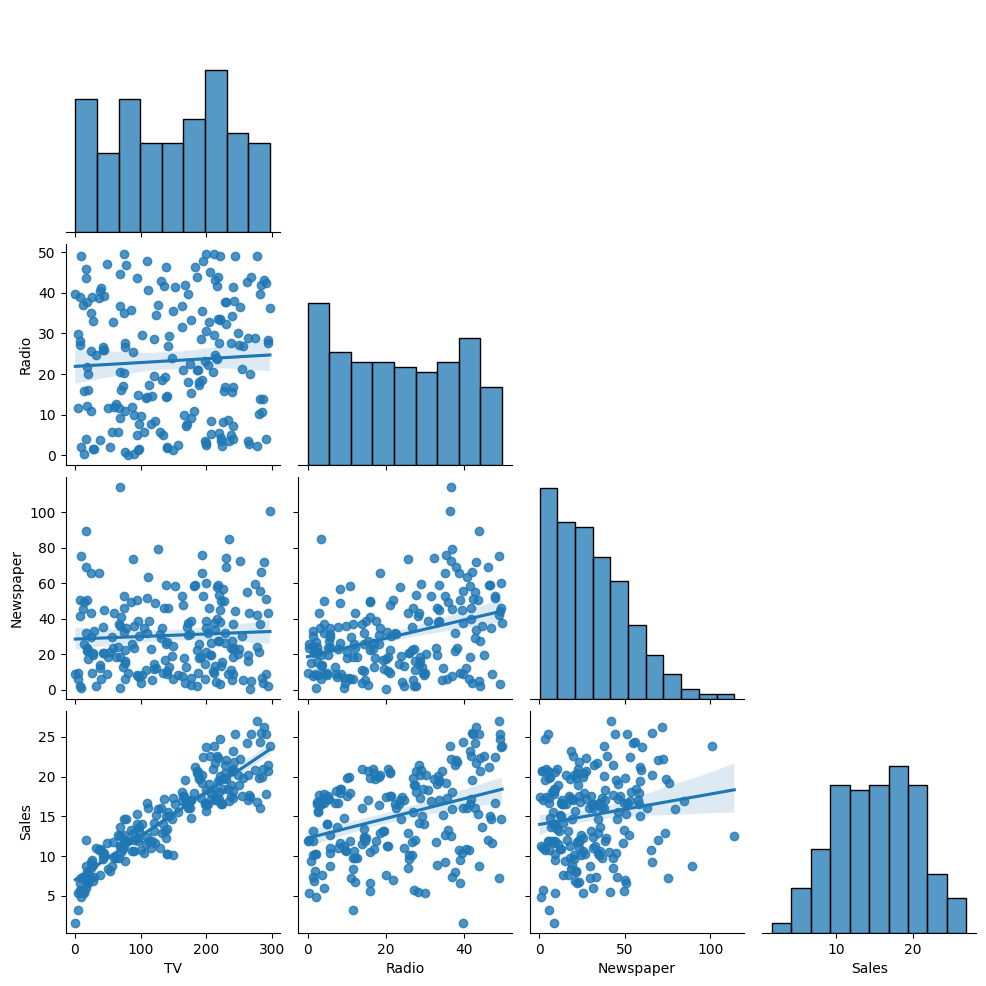

In [33]:
# visualization of data to better observe the dataset
sns.pairplot(advertising, kind = 'reg', corner = True);

In [35]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [36]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.52e-52
Time:                        15:10:00   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""